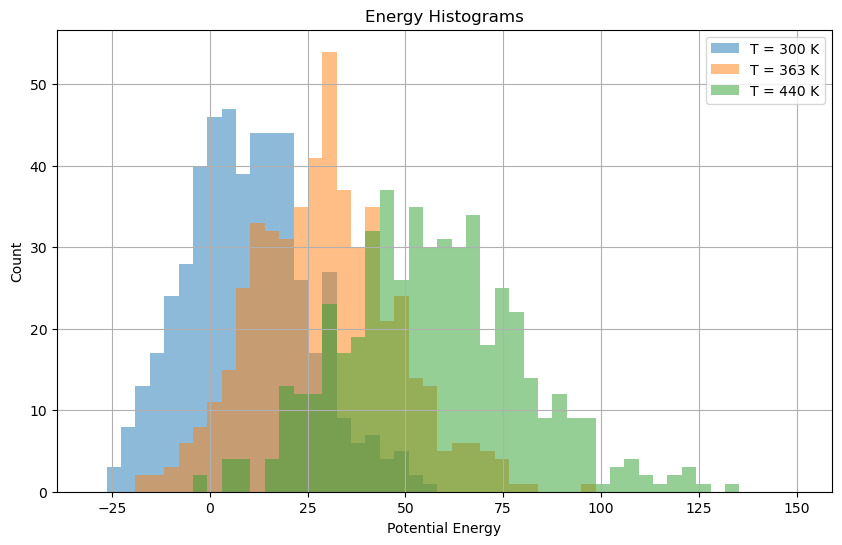

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the XVG files
energy_300 = np.loadtxt('T300/T300_potential_energy.xvg', comments=['#', '@'])
energy_363 = np.loadtxt('T363/T363_potential_energy.xvg', comments=['#', '@'])
energy_440 = np.loadtxt('T440/T440_potential_energy.xvg', comments=['#', '@'])

# Define bin edges for the histogram
bins = np.linspace(-30, 150, 50)

# Create histograms for each dataset
hist_300, _ = np.histogram(energy_300[:, 1], bins=bins)
hist_363, _ = np.histogram(energy_363[:, 1], bins=bins)
hist_440, _ = np.histogram(energy_440[:, 1], bins=bins)

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(energy_300[:, 1], alpha=0.5, label='T = 300 K', bins=bins)
plt.hist(energy_363[:, 1], alpha=0.5, label='T = 363 K', bins=bins)
plt.hist(energy_440[:, 1], alpha=0.5, label='T = 440 K', bins=bins)

plt.xlabel('Potential Energy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Energy Histograms')
plt.grid(True)
plt.show()


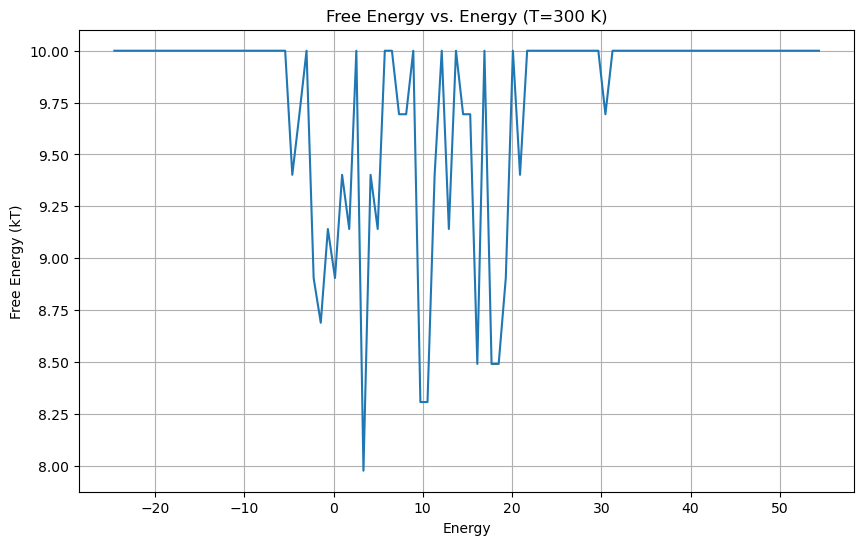

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Load potential energy data for T=300 K
energy_300 = np.loadtxt('T300/T300_potential_energy.xvg', comments=['#', '@'])

# Boltzmann constant * 300K in kJ/mol for T=300
kT = 2.479

# Create a histogram of potential energy data
hist, bin_edges = np.histogram(energy_300[:, 1], bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Avoid divide by zero by adding a small constant
hist[hist == 0] = 1e-10

# Calculate the free energy using the Boltzmann distribution
free_energy = -kT * np.log(hist)

# Set a maximum free energy value (e.g., 10 kT)
max_free_energy = 10
free_energy[free_energy > max_free_energy] = max_free_energy

# Create a line plot of free energy vs. energy
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, free_energy, linestyle='-')
plt.xlabel('Energy')
plt.ylabel('Free Energy (kT)')
plt.title('Free Energy vs. Energy (T=300 K)')
plt.grid(True)
plt.show()


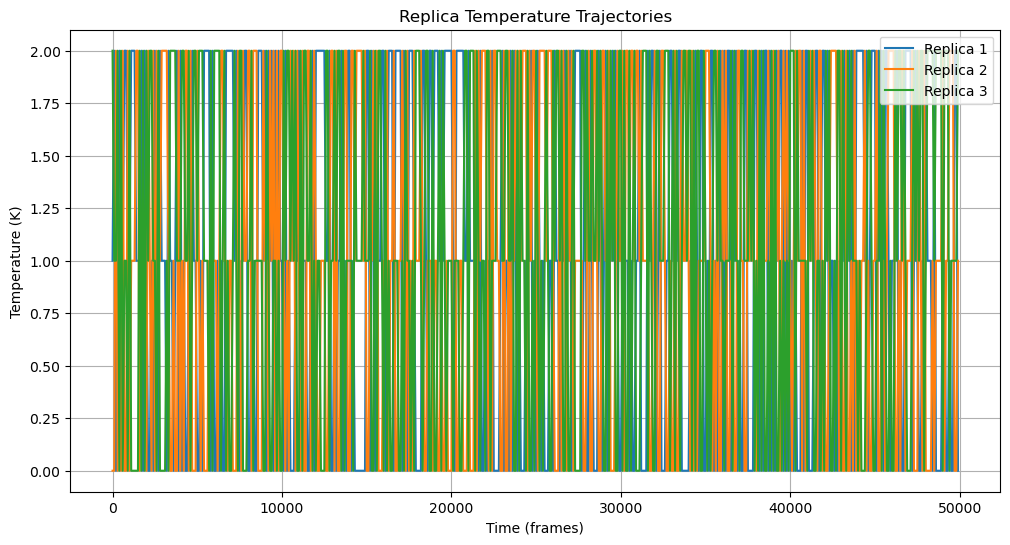

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from replica_temp.xvg
data = np.loadtxt('T300/replica_temp.xvg', skiprows=1)
temperatures = data[::100, 1:]  # Extract every 100th frame's temperature data

# Create a time array for x-axis (every 100th frame)
time = np.arange(0, temperatures.shape[0]) * 100

# Plot temperature vs. time for each replica
plt.figure(figsize=(12, 6))
for replica in range(temperatures.shape[1]):
    plt.plot(time, temperatures[:, replica], label=f'Replica {replica + 1}')

plt.xlabel('Time (frames)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.title('Replica Temperature Trajectories')
plt.grid(True)
plt.show()
